In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

C:\Users\sh2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("data.csv")
data.head()

,year,month,day,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,close,open,high,low,change
0,2011,4,11,23.678598,1.862068,3.365532,129.260966,22.046661,28,2,4,150,26,12381.11,12380.43,12476.93,12319.35,0.0001
1,2011,4,12,23.436641,1.568504,1.807040,110.107599,28.552481,28,2,2,128,33,12263.58,12381.04,12381.04,12185.09,-0.9500
2,2011,4,13,17.595715,3.441165,3.351268,103.535217,17.206766,21,4,4,121,21,12270.99,12263.73,12372.94,12203.63,0.0006
3,2011,4,14,16.065135,4.921378,5.183304,102.417106,15.457086,19,6,6,121,18,12285.15,12270.24,12332.71,12137.98,0.0012
4,2011,4,15,16.869910,1.555661,3.334624,121.630811,14.709462,20,2,4,141,18,12341.83,12285.45,12402.61,12238.34,0.0046


In [3]:
label = pd.DataFrame(data.iloc[:,-5:])
data = data.iloc[:,3:13]

In [4]:
#밀어버릴날짜
label = label.iloc[2:,:]
data = data.iloc[:-2,:]
label = label.reset_index().iloc[:,1:]
data = data.reset_index().iloc[:,1:]

In [5]:
train_data = data.iloc[:-50,:]
test_data = data.iloc[-50:,:]
train_label = label.iloc[:-50,0]
test_label = label.iloc[-50:,0]

In [6]:
scaler_1 = RobustScaler()
scaler_2 = RobustScaler()
scale_data= scaler_1.fit_transform(train_data)
scale_label = pd.DataFrame(scaler_2.fit_transform(pd.DataFrame(train_label)))

In [7]:
scale_data = pd.DataFrame(scale_data,columns=['anger_score', 'disgust_score', 'fear_score',
       'joy_score', 'sadness_score', 'anger_count', 'disgust_count',
       'fear_count', 'joy_count', 'sadness_count'])
test_data = pd.DataFrame(scaler_1.transform(test_data),columns=['anger_score', 'disgust_score', 'fear_score',
       'joy_score', 'sadness_score', 'anger_count', 'disgust_count',
       'fear_count', 'joy_count', 'sadness_count'])
test_label = pd.DataFrame(scaler_2.transform(test_label.reshape(-1,1)))

In [ ]:
real_value = scaler_2.inverse_transform(test_label)

In [12]:
GBoost = GradientBoostingRegressor(min_samples_split=0.65,max_depth=4,random_state=2,\
                                  learning_rate =0.11, n_estimators=101)
GBoost.fit(scale_data,scale_label)
res = GBoost.predict(test_data)
my_test = scaler_2.inverse_transform(res.reshape(-1,1))
test_cor = pd.concat([pd.DataFrame(my_test),pd.DataFrame(real_value)],axis=1)
test_cor.corr()

C:\Users\sh2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,0
0,1.000000,0.442323
0,0.442323,1.000000


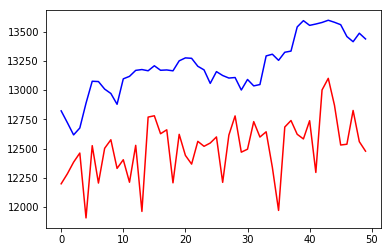

In [13]:
plt.plot(my_test,color='red')
real_value = scaler_2.inverse_transform(test_label)
plt.plot(real_value,color='blue')

In [15]:
from sklearn.externals import joblib

In [21]:
joblib.dump(GBoost,"emotion_regressor.pkl")

['emotion_regressor.pkl']

In [18]:

test_regressor_1 = joblib.load("test.pkl")